In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns

In [2]:
# read dataset
df = pd.read_csv('data/Loan_Default.csv')
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [3]:
# dataset shape
row, col = df.shape
print('row: ',row)
print('col: ',col)

row:  148670
col:  34


In [4]:
equi_data = df[df['credit_type'] == 'EQUI']
equi_data.describe()  # 查看 EQUI 类别申请者的特征统计信息

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,15298.000000,15298.0,1.529800e+04,201.000000,1.0000,154.000000,15286.000000,2.020000e+02,15083.000000,15298.000000,202.000000,15298.000000,2.000000
mean,99394.045627,2019.0,3.282368e+05,4.353682,1.0355,1558.645519,334.081185,2.498812e+05,6496.703574,700.496666,82.916543,0.999935,32.000000
std,43104.050703,0.0,2.018349e+05,0.496360,NaN,2293.751846,58.183067,1.720738e+05,6378.164245,115.861780,13.535523,0.008085,14.142136
min,24891.000000,2019.0,1.650000e+04,3.125000,1.0355,0.000000,96.000000,4.800000e+04,0.000000,500.000000,17.225610,0.000000,22.000000
25%,62023.000000,2019.0,1.865000e+05,3.990000,1.0355,0.000000,360.000000,1.305000e+05,3240.000000,600.000000,77.173913,1.000000,27.000000
50%,99930.000000,2019.0,2.865000e+05,4.375000,1.0355,684.225000,360.000000,2.030000e+05,5280.000000,700.000000,84.420290,1.000000,32.000000
75%,137029.500000,2019.0,4.265000e+05,4.750000,1.0355,2307.557500,360.000000,3.180000e+05,8100.000000,802.000000,92.284361,1.000000,37.000000
max,173553.000000,2019.0,3.346500e+06,5.500000,1.0355,15584.000000,360.000000,1.358000e+06,198060.000000,900.000000,99.623116,1.000000,42.000000


In [5]:
# brief description for numerical data
df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [6]:
# brief description for categorical data
df.describe(include=['object'])

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,...,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type
count,145326,148670,147762,148670,148536,148670,148670,148670,148549,148670,...,148670,148670,148670,148670,148670,148670,148470,148470,148670,148670
unique,2,4,2,3,4,2,2,2,2,2,...,2,3,2,4,4,2,7,2,4,2
top,cf,Male,nopre,type1,p3,l1,nopc,nob/c,not_neg,not_int,...,sb,pr,home,1U,CIB,CIB,45-54,to_inst,North,direct
freq,135348,42346,124621,113173,55934,142344,148114,127908,133420,141560,...,148637,138201,148637,146480,48152,74392,34720,95814,74722,148637


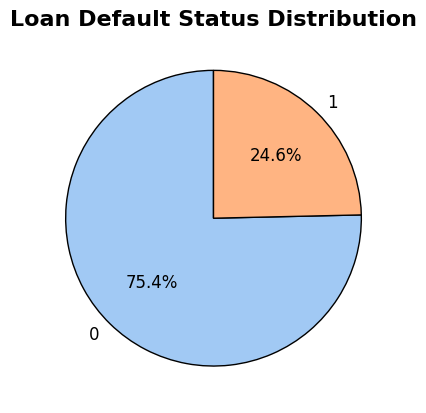

In [7]:
# Plotting the pie chart for status
colors = sns.color_palette('pastel')[0:2]

df['Status'].value_counts().plot.pie(
    autopct='%1.1f%%', 
    colors=colors, 
    startangle=90, 
    wedgeprops={'edgecolor': 'black'}, 
    textprops={'fontsize': 12}
)
plt.title('Loan Default Status Distribution', fontsize=16, fontweight='bold')
plt.ylabel('')  
plt.show()

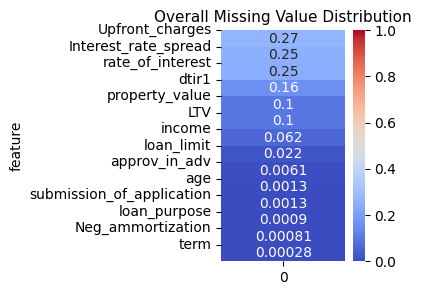

In [8]:
# check overall missing value
missing_frac = (df.isna().sum()[df.isna().sum()>0]/len(df)).sort_values(ascending=False)

plt.figure(figsize=(2,3))
ax = sns.heatmap([[i] for i in missing_frac.values], annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.yticks(ticks=np.arange(len(missing_frac)), labels=missing_frac.index)
plt.title('Overall Missing Value Distribution', fontsize=11) 
plt.ylabel('feature')
ax.set_yticklabels(labels=missing_frac.index,rotation=0)
plt.show()

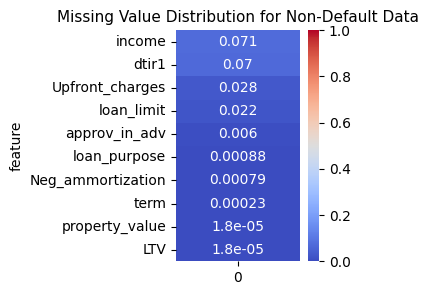

In [9]:
df_statu0 = df[df['Status']==0]
df_statu1 = df[df['Status']==1]

# check missing value for non-default data
missing_frac = (df_statu0.isna().sum()[df_statu0.isna().sum()>0]/len(df_statu0)).sort_values(ascending=False)

plt.figure(figsize=(2,3))
ax = sns.heatmap([[i] for i in missing_frac.values], annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Missing Value Distribution for Non-Default Data', fontsize=11) 
plt.ylabel('feature')
ax.set_yticklabels(labels=missing_frac.index,rotation=0)
plt.show()

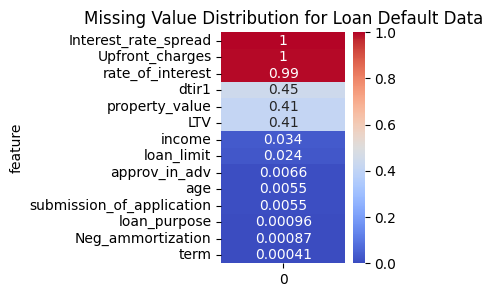

In [10]:
# check missing value for default data
missing_frac = (df_statu1.isna().sum()[df.isna().sum()>0]/len(df_statu1)).sort_values(ascending=False)

plt.figure(figsize=(2,3))
ax = sns.heatmap([[i] for i in missing_frac.values], annot=True, cmap='coolwarm', vmin=0, vmax=1)

plt.title('Missing Value Distribution for Loan Default Data', fontsize=12) 
plt.ylabel('feature')
ax.set_yticklabels(labels=missing_frac.index,rotation=0)
plt.show()

In [11]:
# drop data without much information

df.drop(columns=['ID','year','Interest_rate_spread','Upfront_charges','rate_of_interest'],inplace=True)

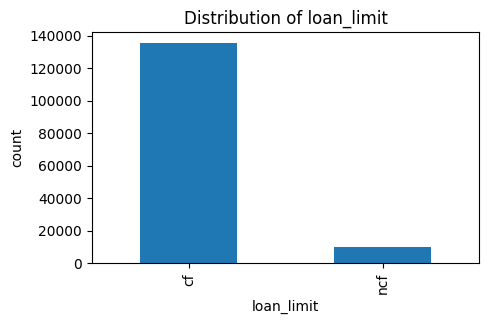

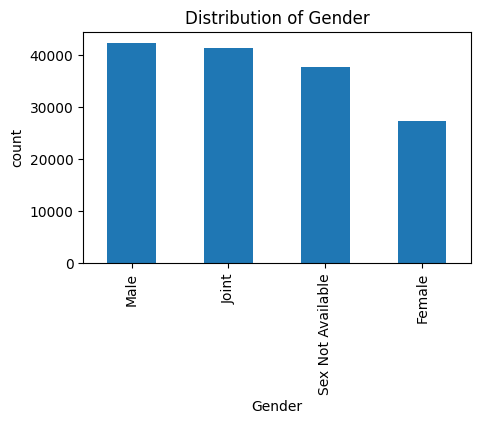

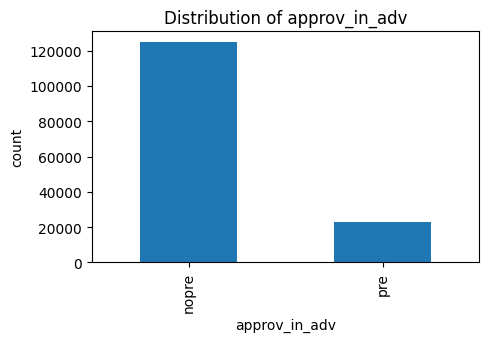

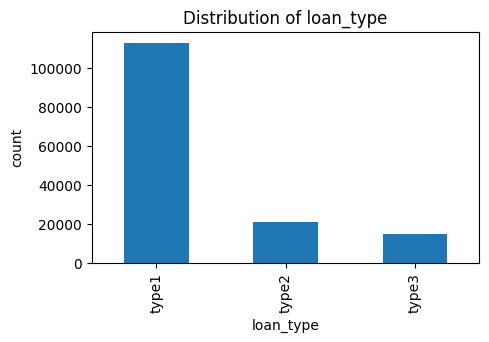

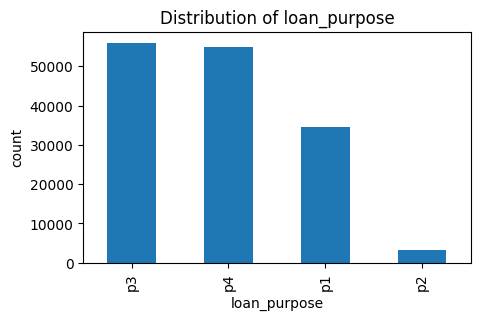

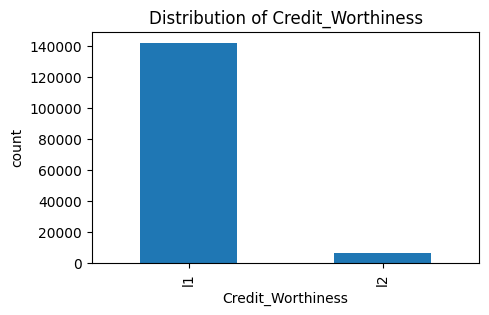

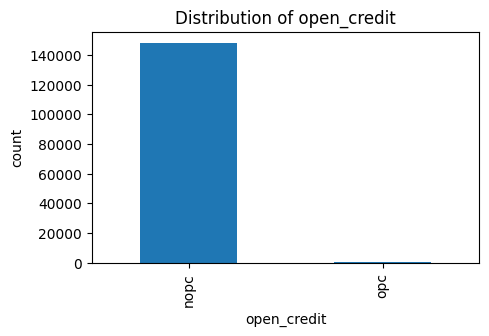

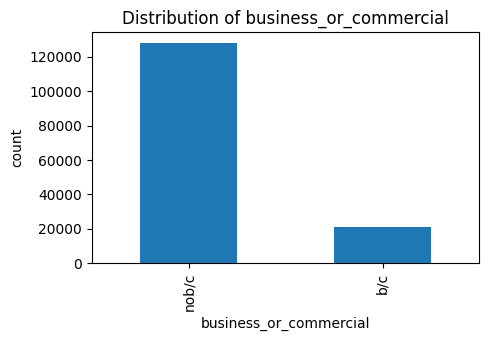

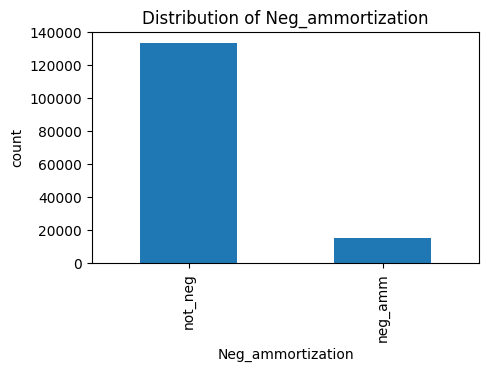

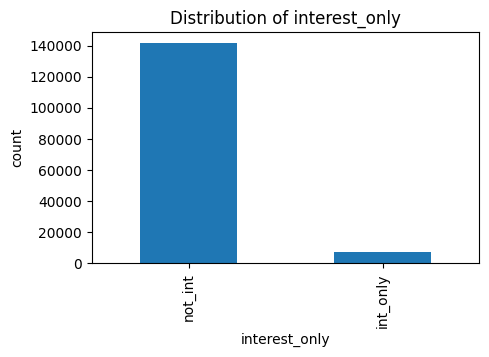

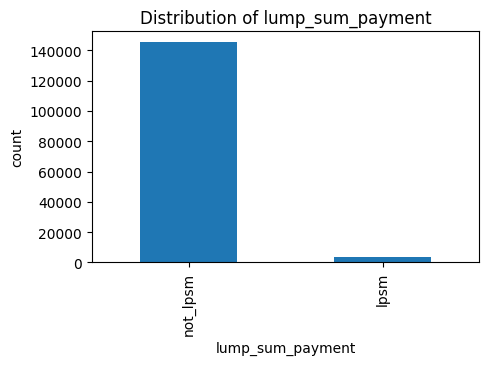

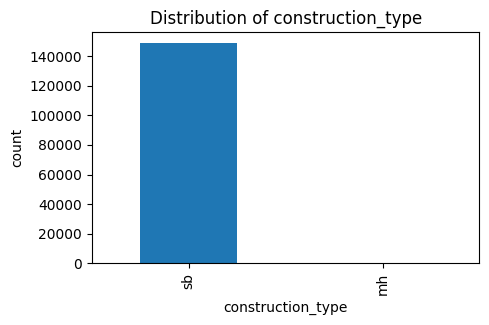

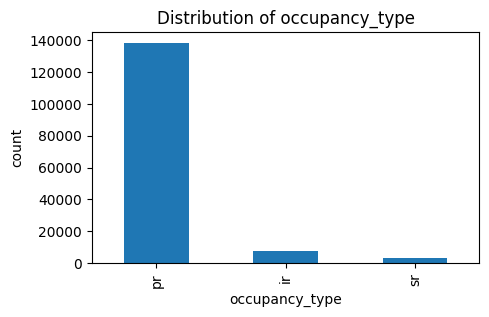

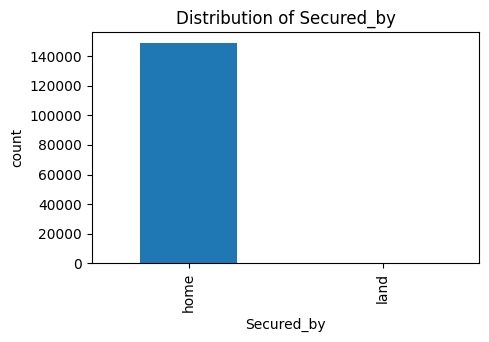

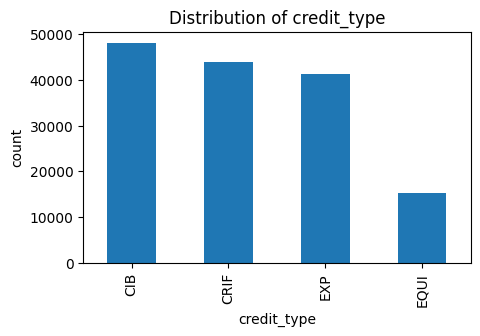

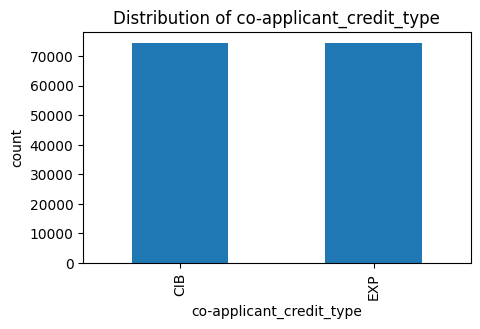

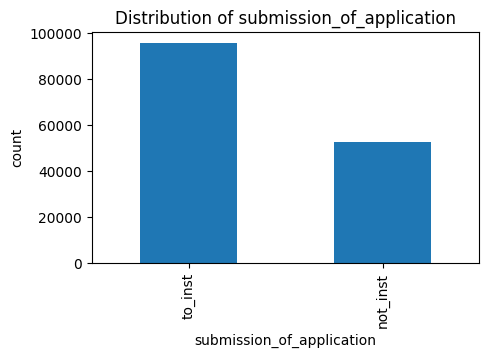

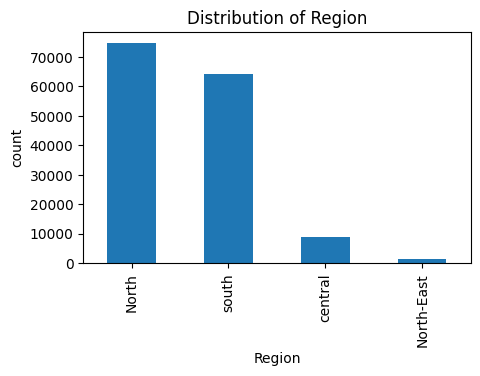

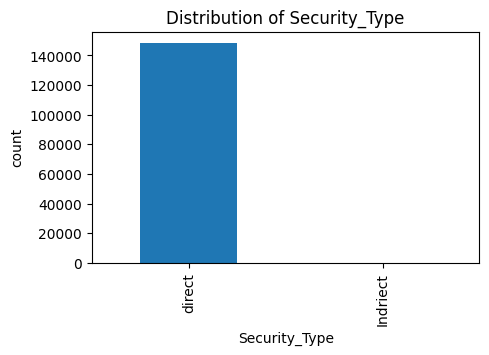

In [12]:
# bar plot for distribution of categorical features

for col in df.select_dtypes(['object']).columns.drop(['age','total_units']):
    
    df[col].value_counts().plot(kind='bar', stacked=True,figsize=(5,3))

    plt.xlabel(col)
    plt.ylabel('count')
    plt.title(f'Distribution of {col}')
    plt.show()

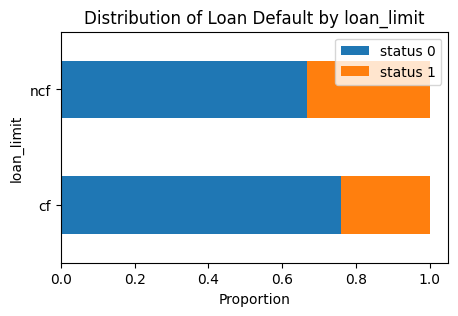

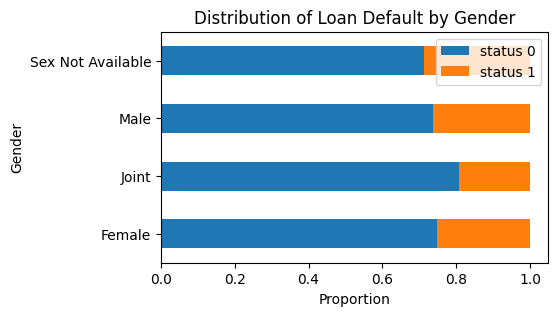

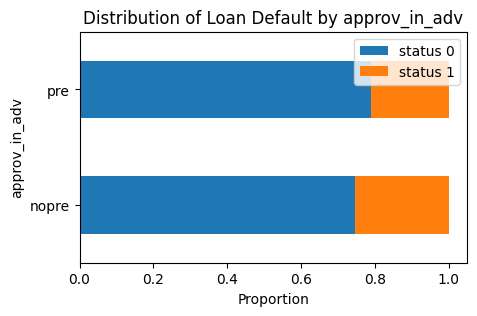

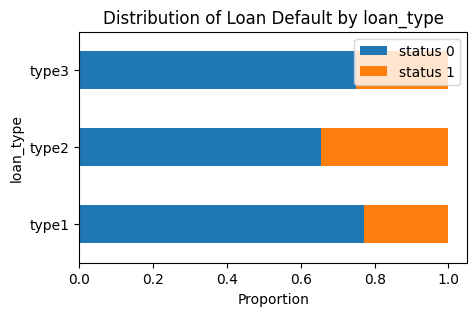

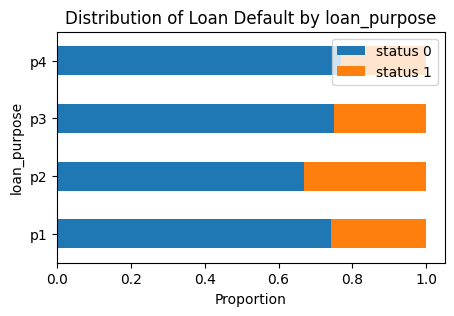

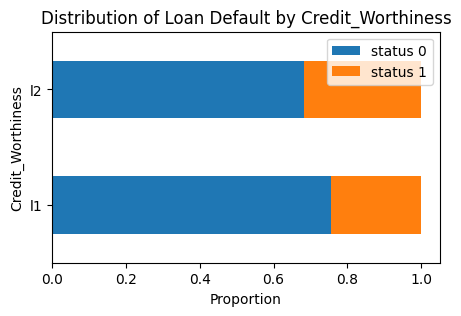

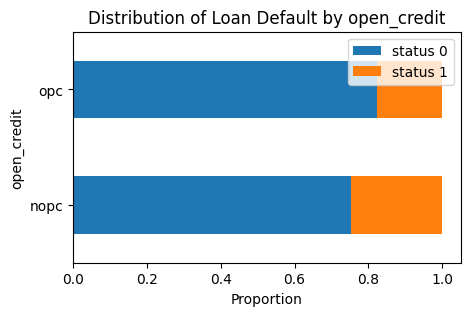

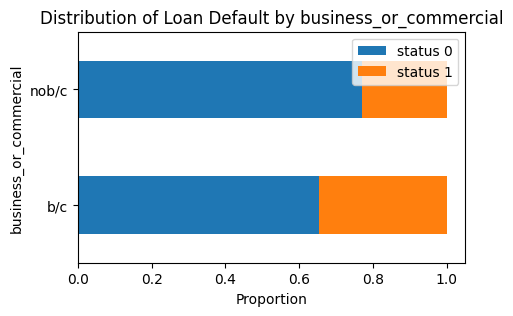

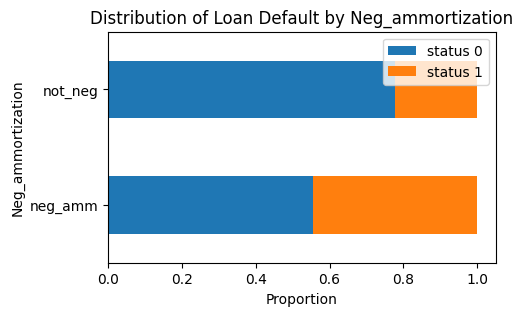

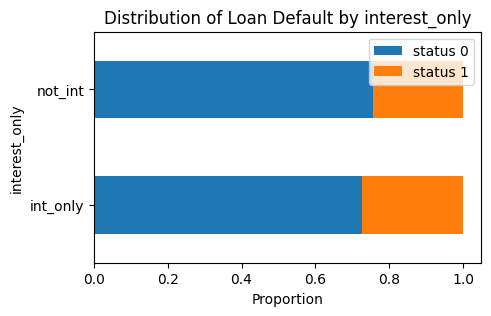

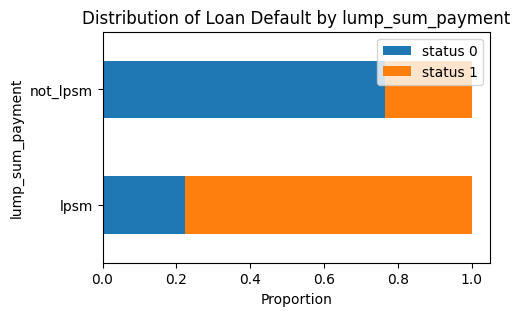

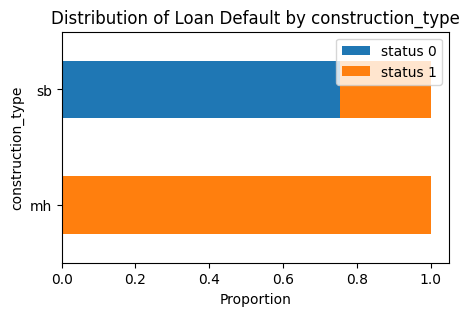

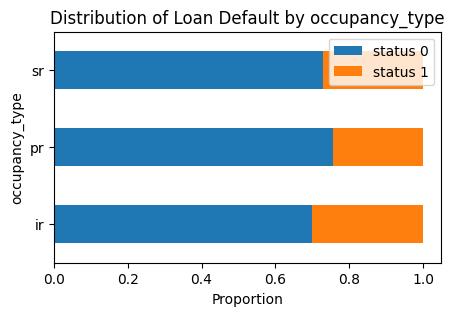

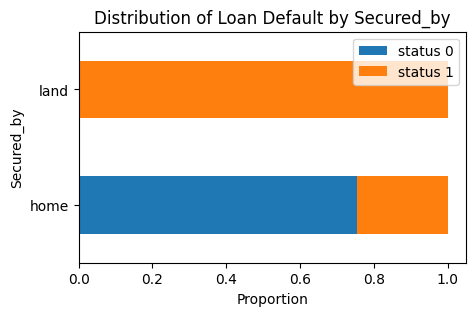

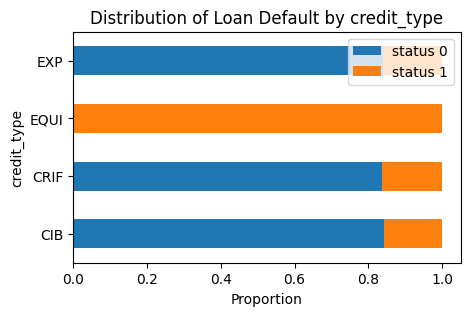

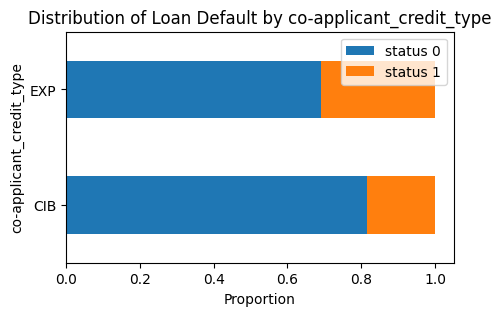

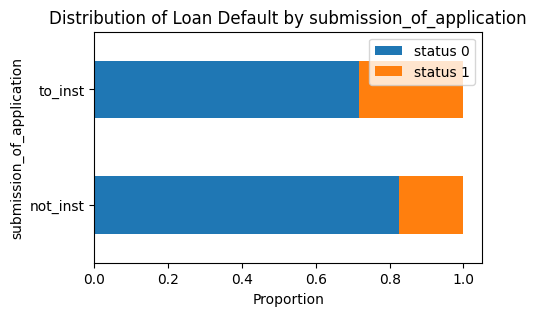

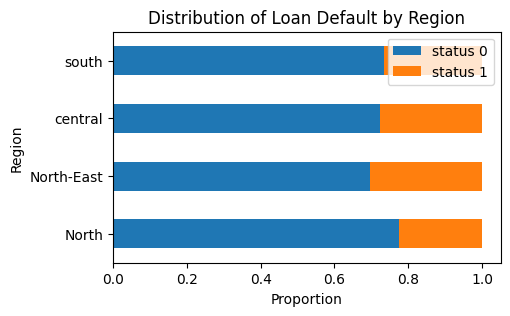

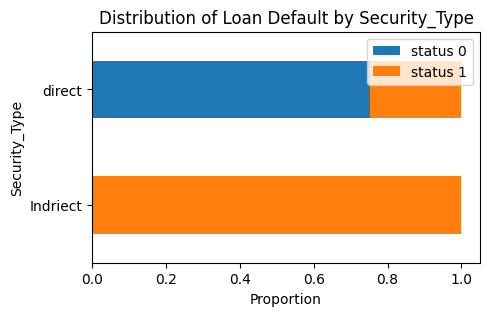

In [13]:
# stacked bar plot for proportion of categorical features by loan default

for col in df.select_dtypes(['object']).columns.drop(['age','total_units']):
    count_matrix= df.groupby([col,'Status']).size().unstack().fillna(0)
    count_matrix.T.apply(lambda x :x/sum(x)).T.plot(kind='barh', stacked=True,figsize=(5,3))
    plt.legend(['status 0','status 1'],loc='upper right')
    plt.xlabel('Proportion')
    plt.title(f'Distribution of Loan Default by {col}')
    plt.show()

age
<25       1337
25-34    19142
35-44    32818
45-54    34720
55-64    32534
65-74    20744
>74       7175
Name: count, dtype: int64


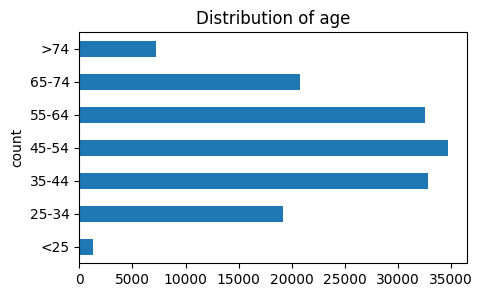

total_units
1U    146480
2U      1477
3U       393
4U       320
Name: count, dtype: int64


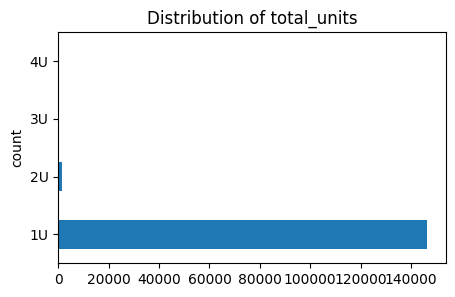

In [14]:
# bar plot for distribution of ordinal features
count_matrix = df['age'].value_counts().reindex( ['<25','25-34','35-44','45-54','55-64','65-74','>74'])
print(count_matrix)

count_matrix.plot(kind='barh',figsize=(5,3))
plt.title('Distribution of age')
plt.ylabel('count')
plt.show()

count_matrix = df['total_units'].value_counts().reindex( ['1U','2U','3U','4U'])
print(count_matrix)

count_matrix.plot(kind='barh',figsize=(5,3))
plt.title('Distribution of total_units')
plt.ylabel('count')
plt.show()

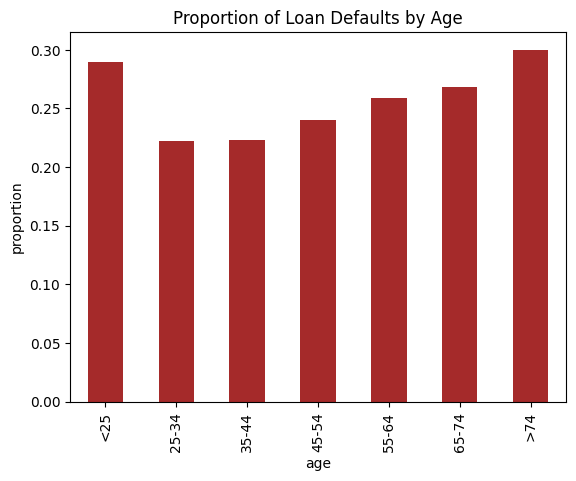

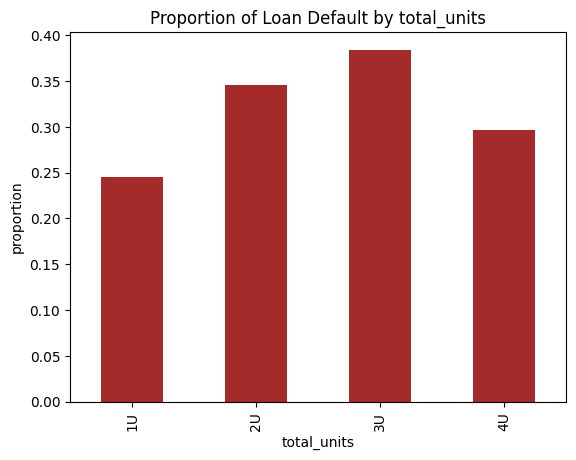

In [15]:
# bar plot for proportion of Loan default by ordinal features
proportion_defaults = df.groupby('age')['Status'].mean().reindex( ['<25','25-34','35-44','45-54','55-64','65-74','>74'])
proportion_defaults.plot.bar(color='brown')
plt.title('Proportion of Loan Defaults by Age')
plt.xlabel('age')
plt.ylabel('proportion')
plt.show()

proportion_defaults = df.groupby('total_units')['Status'].mean().reindex( ['1U','2U','3U','4U'])
proportion_defaults.plot.bar(color='brown')
plt.title('Proportion of Loan Default by total_units')
plt.xlabel('total_units')
plt.ylabel('proportion')
plt.show()

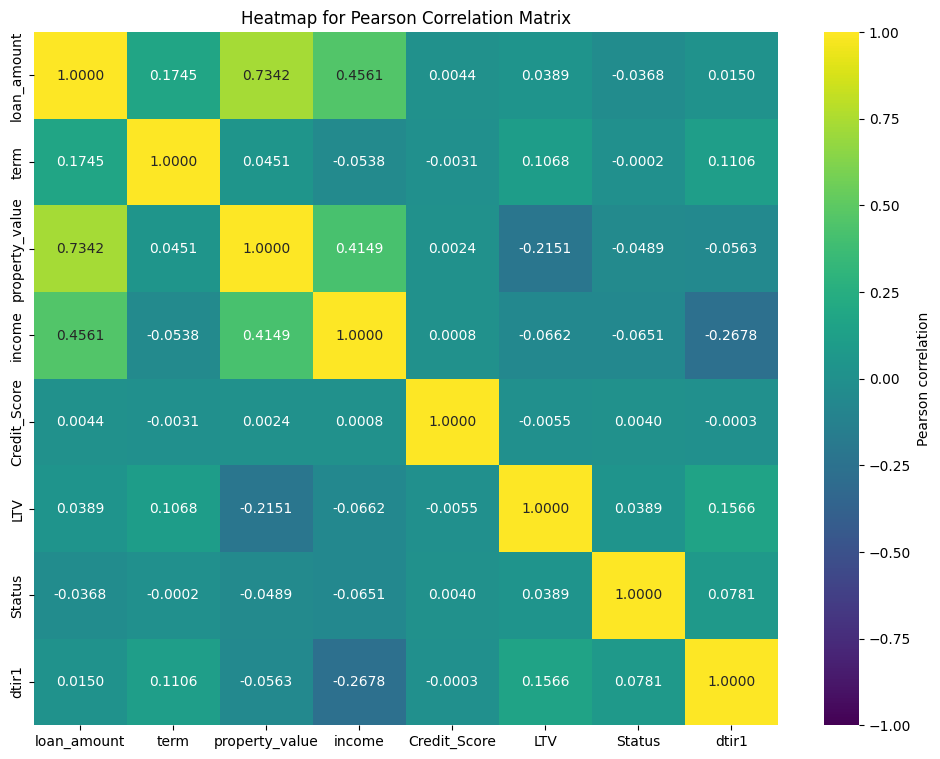

loan_amount       0.734249
term              0.174474
property_value    0.734249
income            0.456065
Credit_Score      0.004438
LTV               0.156557
Status            0.078083
dtir1             0.156557
dtype: float64

In [16]:
# correlation analysis with heatmap

numerical_feature = df.select_dtypes(include=['float','int']).columns
correlation_matrix = df[numerical_feature].corr(method='pearson')


plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.4f', vmin=-1, vmax=1, 
            xticklabels=numerical_feature, yticklabels=numerical_feature,
            cbar_kws={'label': 'Pearson correlation'})
plt.title('Heatmap for Pearson Correlation Matrix')
plt.show()
correlation_matrix.replace(1,0).max()

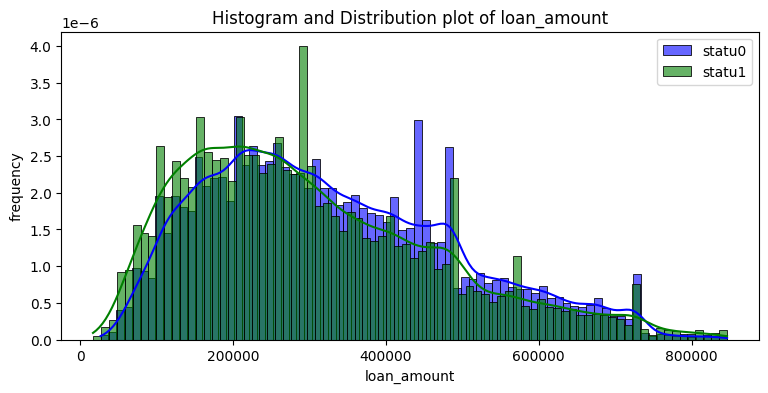

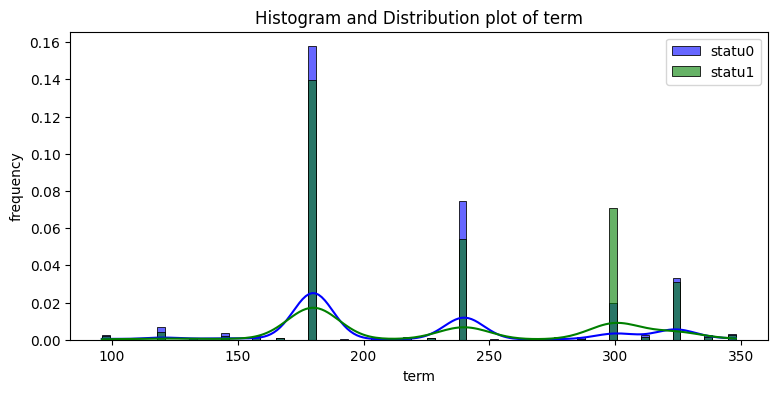

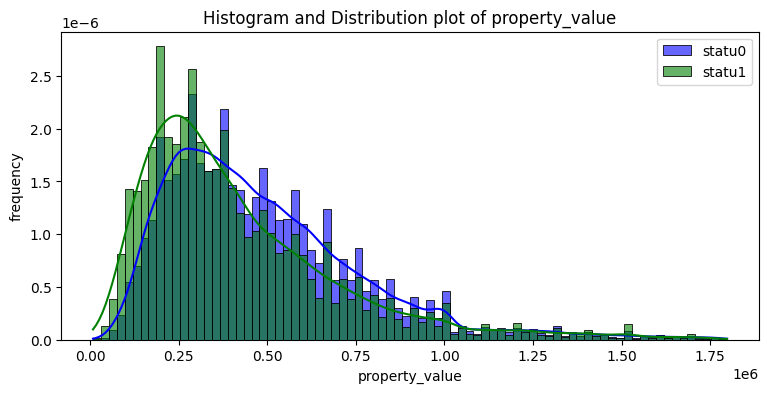

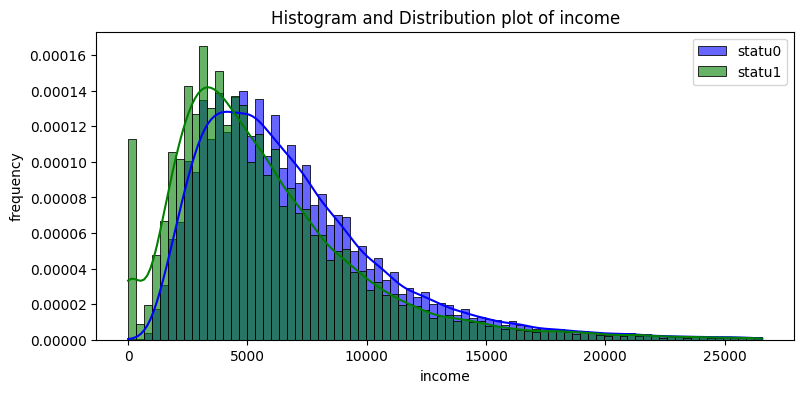

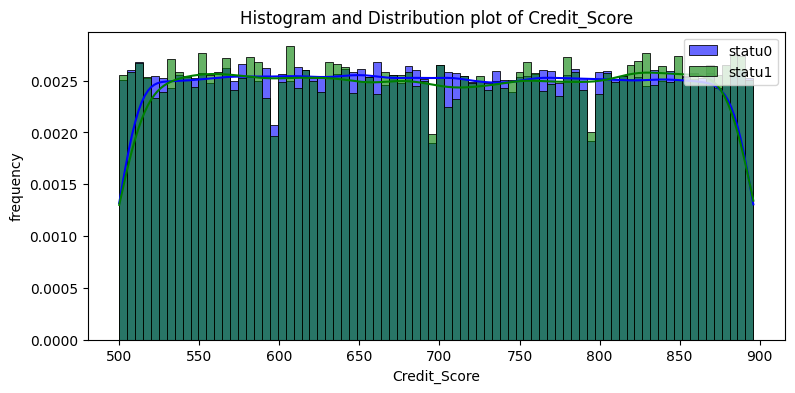

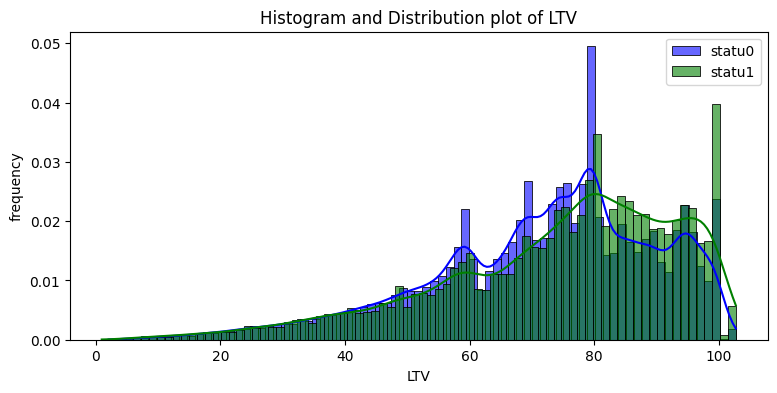

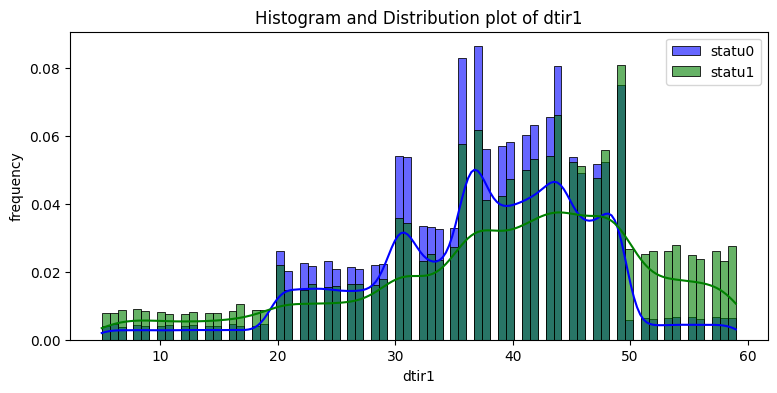

In [17]:
# histgoram of continuous features by loan default
for feature in df.select_dtypes(['int','float']).columns.drop('Status'):
    statu0 = df_statu0[df_statu0[feature]<np.percentile(df[feature].dropna(),99)][feature]
    statu1 = df_statu1[df_statu1[feature]<np.percentile(df[feature].dropna(),99)][feature]

    
    plt.figure(figsize=(9,4))
    sns.histplot(statu0, color='blue', label='statu0', stat='density', bins=80, kde=True, alpha=0.6,lw=2.5)
    sns.histplot(statu1, color='green', label='statu1', stat='density', bins=80, kde=True, alpha=0.6,lw=2.5)


    plt.xlabel(feature)
    plt.ylabel('frequency')
    plt.title(f'Histogram and Distribution plot of {feature}')
    plt.legend(loc='upper right')

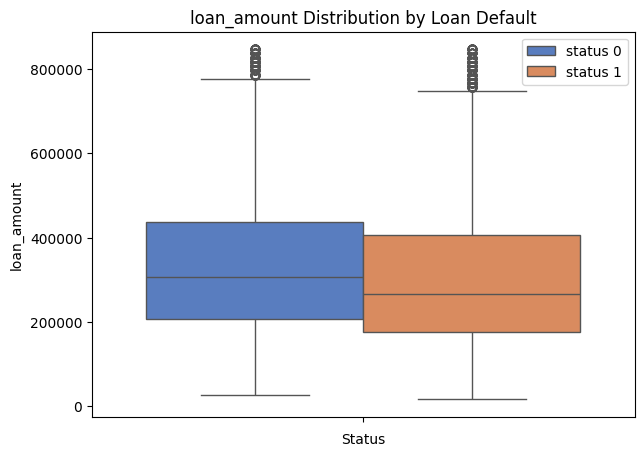

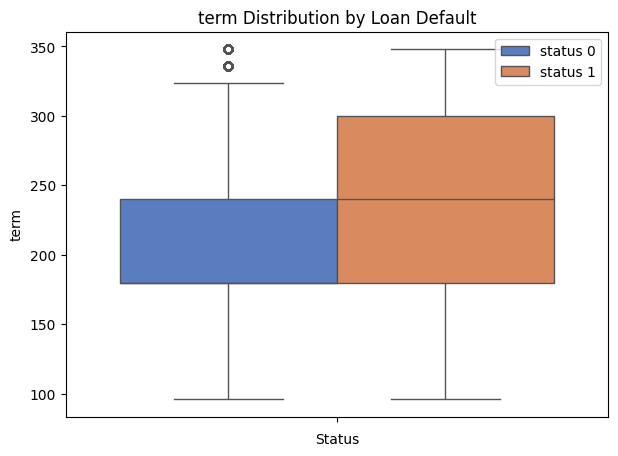

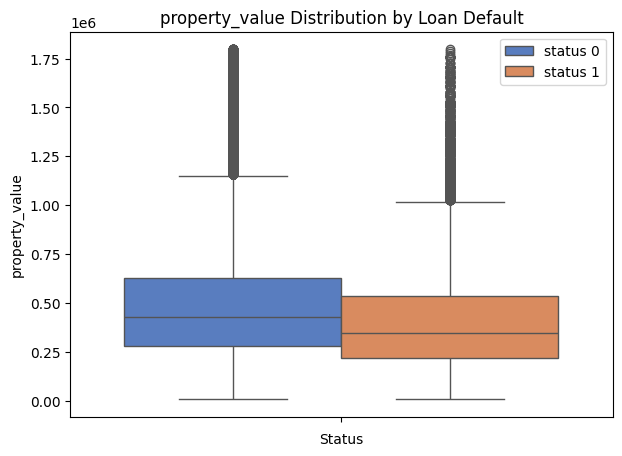

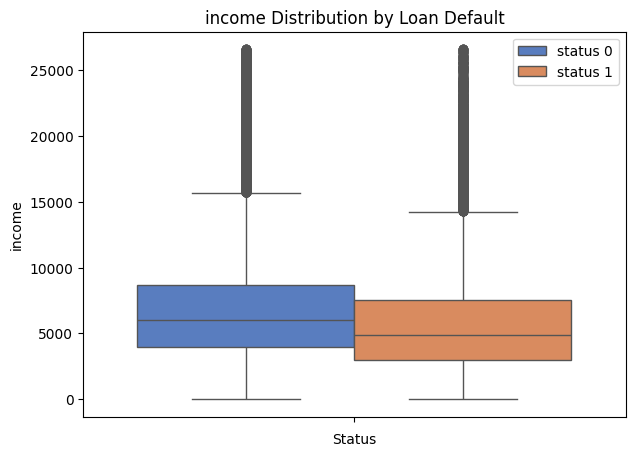

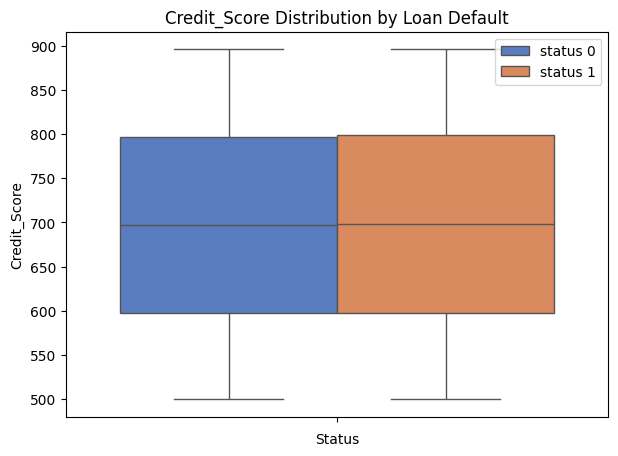

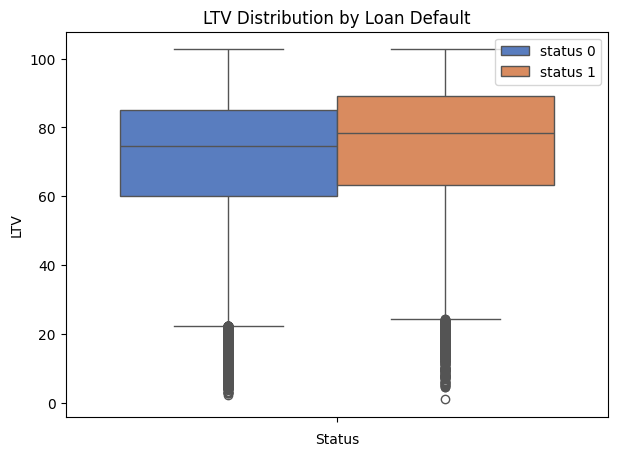

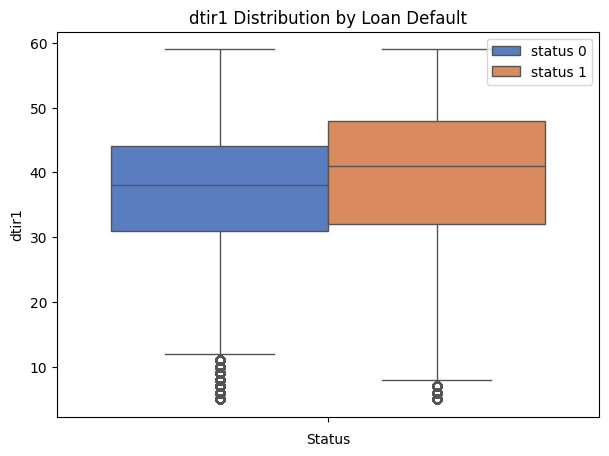

In [18]:
# boxplot of continuous features
for feature in df.select_dtypes(['int','float']).columns.drop('Status'):
    df_feature = df[df[feature]<np.percentile(df[feature].dropna(),99)]

    plt.figure(figsize=(7, 5))
    sns.boxplot(hue='Status', y=feature, data=df_feature, palette='muted')

    plt.title(f'{feature} Distribution by Loan Default')
    plt.xlabel('Status')
    plt.ylabel(feature)
    plt.legend(labels=['status 0','status 1'],loc='upper right')
    plt.show()

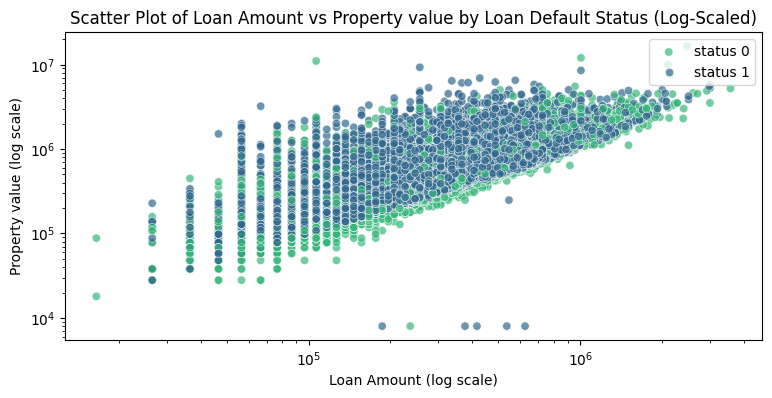

In [19]:
# scatterplot between two features
plt.figure(figsize=(9, 4))
sns.scatterplot(data=df, x='loan_amount', y='property_value', hue='Status', palette='viridis', alpha=0.7)

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Loan Amount (log scale)')
plt.ylabel('Property value (log scale)')
plt.title('Scatter Plot of Loan Amount vs Property value by Loan Default Status (Log-Scaled)')
plt.legend(labels=['status 0','status 1'],loc='upper right')
plt.show()

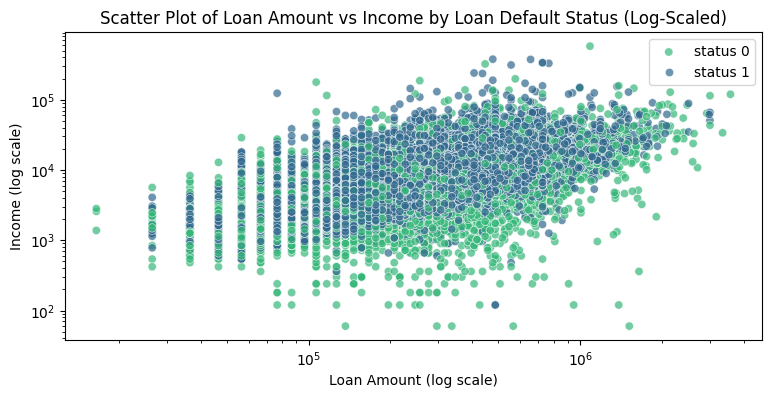

In [20]:
plt.figure(figsize=(9, 4))
sns.scatterplot(data=df, x='loan_amount', y='income', hue='Status', palette='viridis', alpha=0.7)

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Loan Amount (log scale)')
plt.ylabel('Income (log scale)')
plt.title('Scatter Plot of Loan Amount vs Income by Loan Default Status (Log-Scaled)')
plt.legend(labels=['status 0','status 1'],loc='upper right')
plt.show()

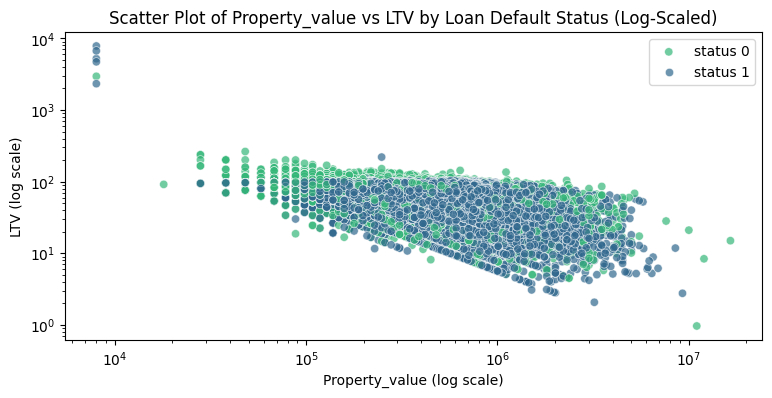

In [21]:
plt.figure(figsize=(9, 4))
sns.scatterplot(data=df, x='property_value', y='LTV', hue='Status', palette='viridis', alpha=0.7)

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Property_value (log scale)')
plt.ylabel('LTV (log scale)')
plt.title('Scatter Plot of Property_value vs LTV by Loan Default Status (Log-Scaled)')
plt.legend(labels=['status 0','status 1'],loc='upper right')
plt.show()

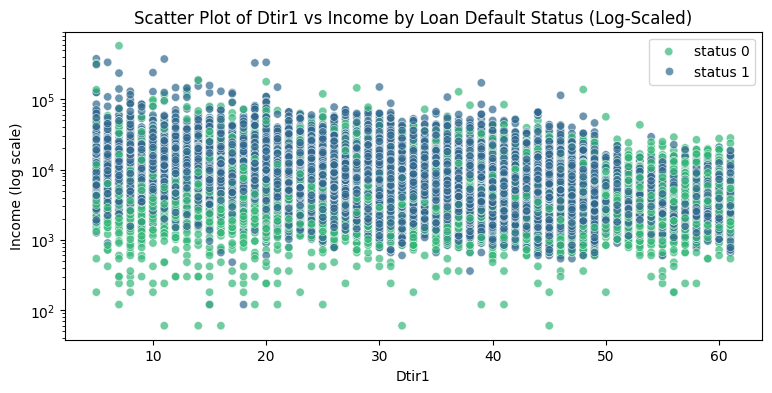

In [22]:
plt.figure(figsize=(9, 4))
sns.scatterplot(data=df, x='dtir1', y='income', hue='Status', palette='viridis', alpha=0.7)

plt.yscale('log')

plt.xlabel('Dtir1')
plt.ylabel('Income (log scale)')
plt.title('Scatter Plot of Dtir1 vs Income by Loan Default Status (Log-Scaled)')
plt.legend(labels=['status 0','status 1'],loc='upper right')
plt.show()

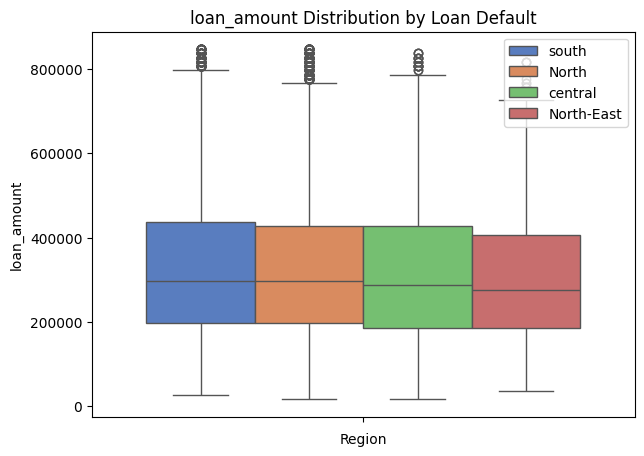

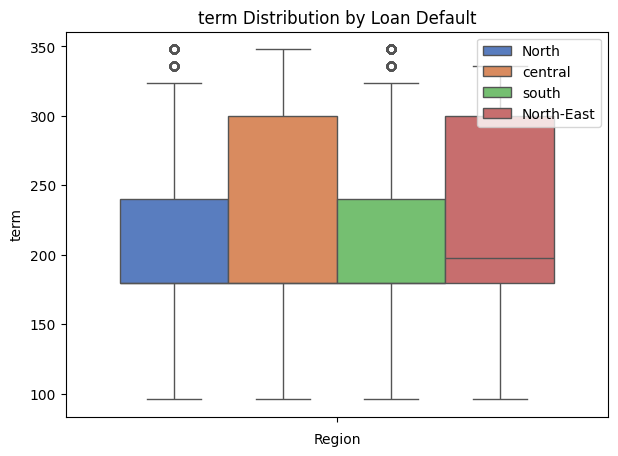

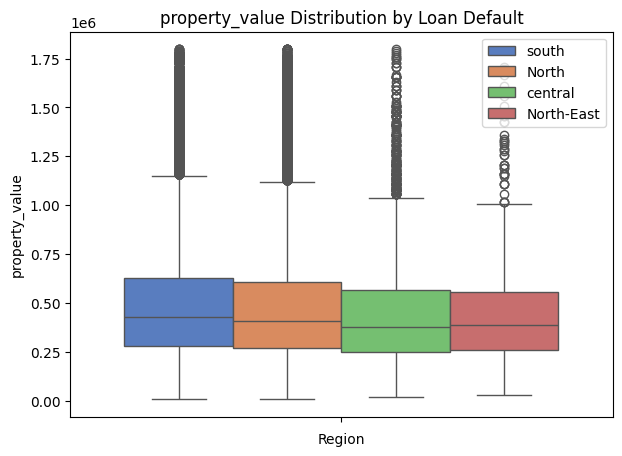

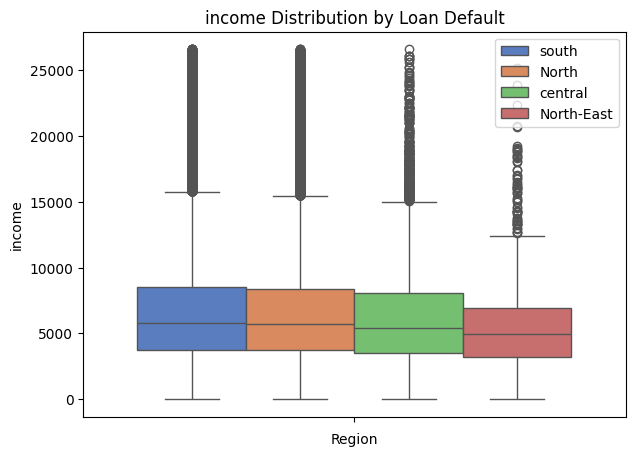

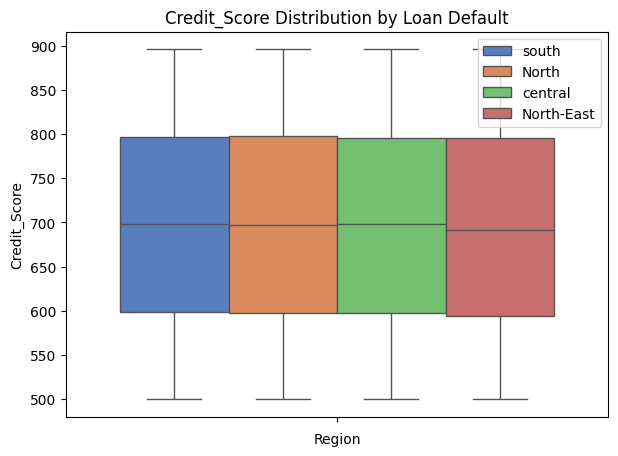

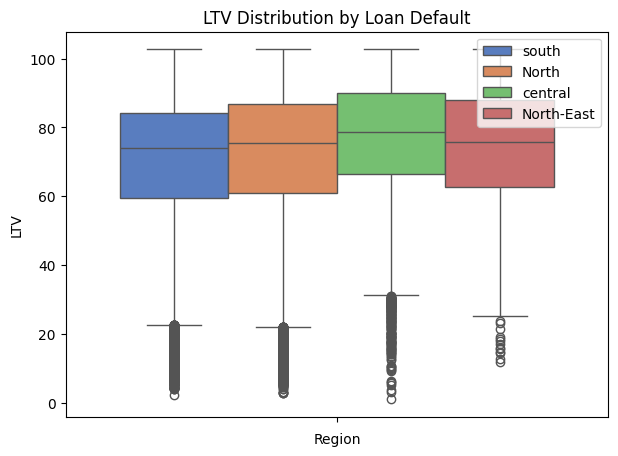

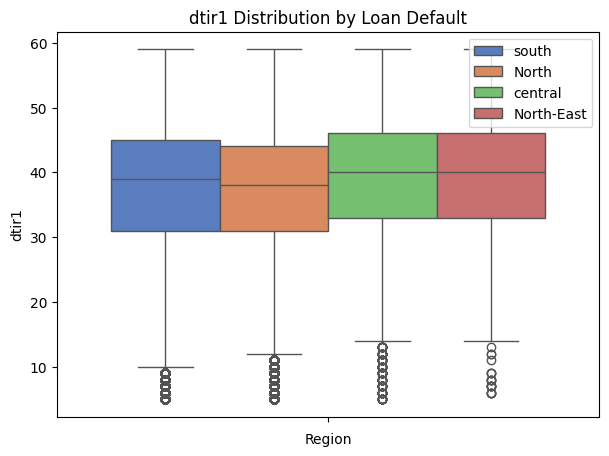

In [23]:
# boxplot between continuous features and region
for feature in df.select_dtypes(['int','float']).columns.drop('Status'):
    df_feature = df[df[feature]<np.percentile(df[feature].dropna(),99)]
    
    plt.figure(figsize=(7, 5))
    sns.boxplot(hue='Region', y=feature, data=df_feature, palette='muted')

    plt.title(f'{feature} Distribution by Loan Default')
    plt.xlabel('Region')
    plt.ylabel(feature)
    plt.legend(loc='upper right')
    plt.show()

### Preprocessing

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer

In [25]:
def label_encode_features(df, features):
    for feature in features:
        unique_values = df[feature].unique()
        if len(unique_values) == 2:
            df[feature] = df[feature].map({unique_values[0]: 0, unique_values[1]: 1})
        else:
            raise ValueError(f"Feature '{feature}' does not contain exactly two unique categories.")

binary_features = []
for feature in df.select_dtypes(['object','category']).columns:
    if len(df[feature].unique()) == 2:
        binary_features.append(feature)

label_encode_features(df, binary_features)
print(binary_features)

['Credit_Worthiness', 'open_credit', 'business_or_commercial', 'interest_only', 'lump_sum_payment', 'construction_type', 'Secured_by', 'co-applicant_credit_type', 'Security_Type']


In [26]:
ordinal_ftrs = ['total_units','age'] 
ordinal_cats = [['1U', '2U', '3U', '4U','missing'], 
                ['<25','25-34','35-44','45-54','55-64','65-74','>74','missing']]
onehot_ftrs = ['loan_limit','approv_in_adv','Gender','loan_type','loan_purpose','Neg_ammortization','occupancy_type','credit_type','submission_of_application','Region']


In [27]:
random_state = 42

categorical_transformer = Pipeline(steps=[
('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

ordinal_transformer = Pipeline(steps=[
('imputer2', SimpleImputer(strategy='constant', fill_value='missing')),
('ordinal', OrdinalEncoder(categories=ordinal_cats))
])

preprocessor = ColumnTransformer(
transformers=[
('cat', categorical_transformer, onehot_ftrs),
('ord', ordinal_transformer, ordinal_ftrs)
], remainder='passthrough')

clf = Pipeline(steps=[
('preprocessor', preprocessor),
('scaler', StandardScaler())
])

### Split data

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

X = df.drop(columns='Status')
y = df['Status']
X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=random_state)


# do StratifiedKFold split on other
kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]    
    X_train = clf.fit_transform(X_train)
    X_val = clf.transform(X_val)

print(f'shape of trainning set :{X_train.shape}')

shape of trainning set :(107043, 53)
